In [4]:
import scanpy as sc
import pandas as pd 
import numpy as np 
import seaborn as sns

In [28]:
df=pd.read_csv('./MNN_detail_res0.8/3_nico_annotation_cluster.csv')
cluster=df.to_numpy()
df=pd.read_csv('./MNN_detail_res0.8/3_nico_annotation_ct_name.csv')
ctname=df.to_numpy()

In [29]:
adata= sc.read_h5ad('./inputQuery/sct_spatial.h5ad')
adata

AnnData object with n_obs × n_vars = 27452 × 468
    obs: 'n_counts', 'leiden0.3', 'leiden0.4', 'leiden0.5', 'leiden0.2', 'leiden0.1', 'leiden0.6', 'leiden0.7', 'leiden0.8', 'leiden1.0', 'leiden0.9'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'dendrogram_leiden1.0', 'leiden', 'leiden0.3_colors', 'leiden1.0_colors', 'neighbors', 'pca', 'pearson_residuals_normalization', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [30]:
np.array_equal(adata.obs_names, cluster[:,0])

True

In [31]:
cluster[0:3]

array([['aaahdpab-1', 5],
       ['aaaiihpl-1', 5],
       ['aaakmjih-1', 5]], dtype=object)

In [32]:
d={}
for i in range(len(ctname)):
    d[ctname[i,0]]=ctname[i,1]

ct=[]
for i in range(len(cluster)):
    ct.append(d[cluster[i,1]])

In [33]:
adata.obs['nico_cluster']=ct 

In [34]:
adata.obs['nico_cluster']

aaahdpab-1    CM_Homeostatic2
aaaiihpl-1    CM_Homeostatic2
aaakmjih-1    CM_Homeostatic2
aaalclhf-1    CM_Homeostatic1
aabbkkne-1      vEC_angio_IFN
                   ...       
ojdkebci-1      vPericyte_INF
ojecgcba-1    vEC_Endocardial
ojecpbkj-1      vEC_angio_IFN
ojehfdpd-1       Neutrophil_1
ojeickfn-1      vEC_angio_IFN
Name: nico_cluster, Length: 27452, dtype: object

/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


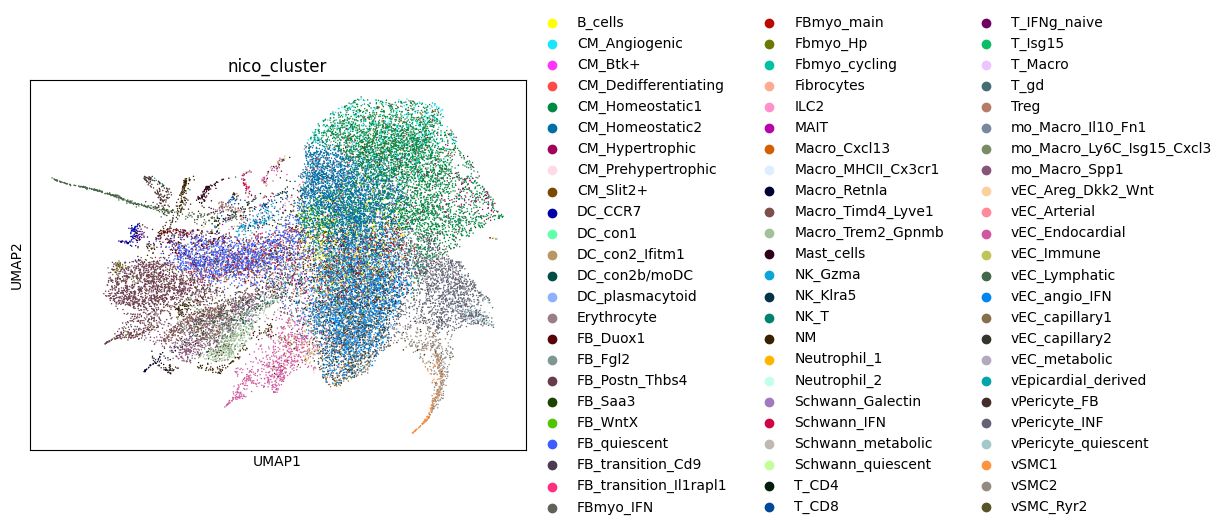

In [35]:
sc.pl.umap(adata, color=["nico_cluster"], wspace=0.4,show=True, save='leiden_detail.png')

/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


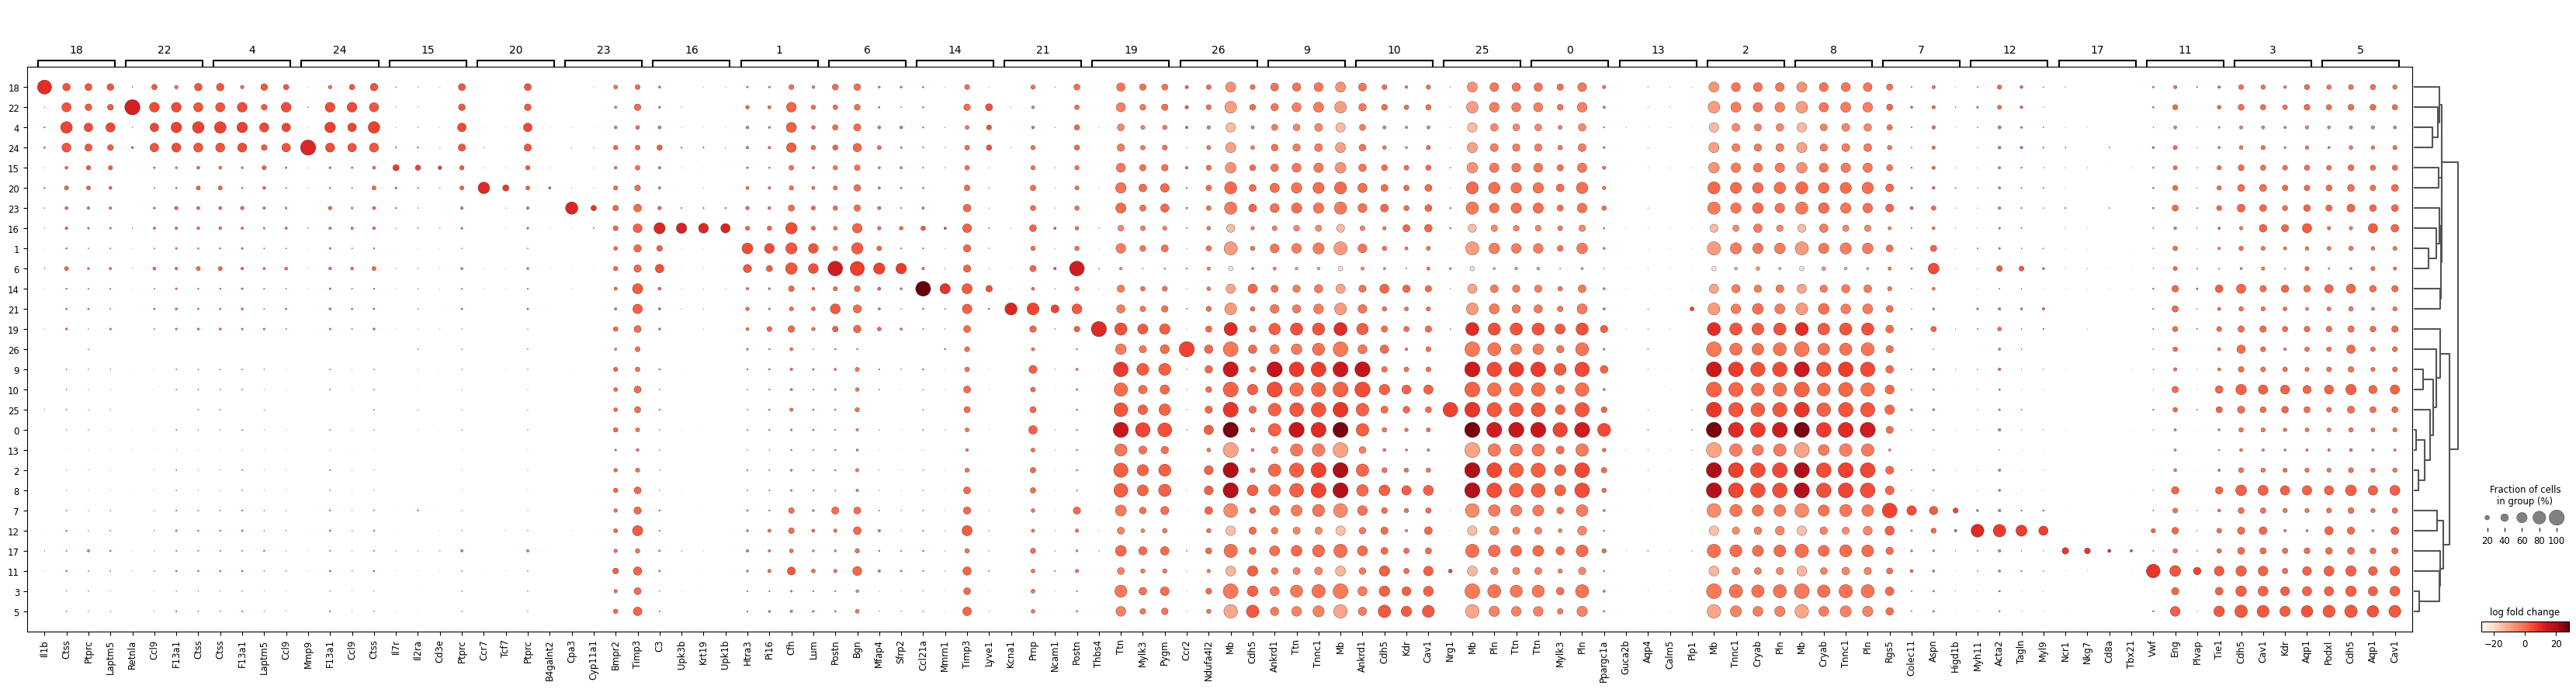

In [36]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4,
                                values_to_plot='logfoldchanges',
                                save='_logFC_detail.pdf'
                               )

In [20]:
marker_genes = {
    "NK_Gzma": ["Gzmb","Ncr1"],
    "NK_Klra5": ["Selenbp1", "Clcnka"],
    "T_CD4_naive": ["Cd3d","Cd4"],
    "T_gd": ["Cd163l1","Trdv4"],
    "MAIT": ["Trgv2"]
}

categories: B_cells, CM_Angiogenic, CM_Btk+, etc.
var_group_labels: NK_Gzma, NK_Klra5, T_CD4_naive, etc.


/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

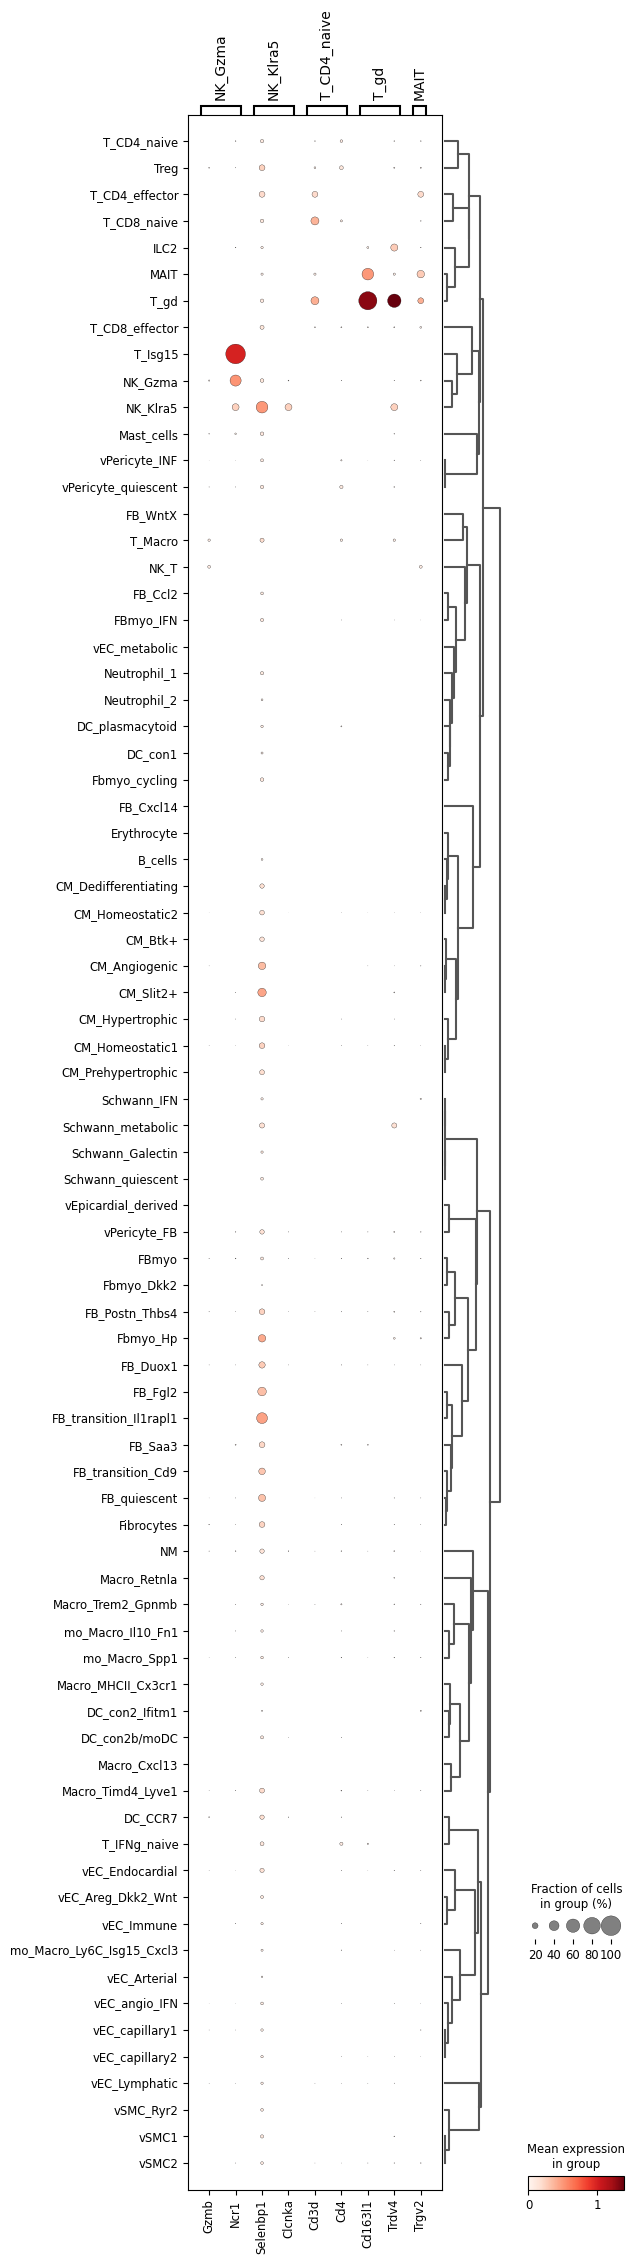

In [21]:
sc.pl.dotplot(adata, marker_genes, "nico_cluster", dendrogram=True)

/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/andychan/miniconda3/envs/nicoUser/lib/python3.11/site-packages/scanpy/tools/_rank_genes_grou

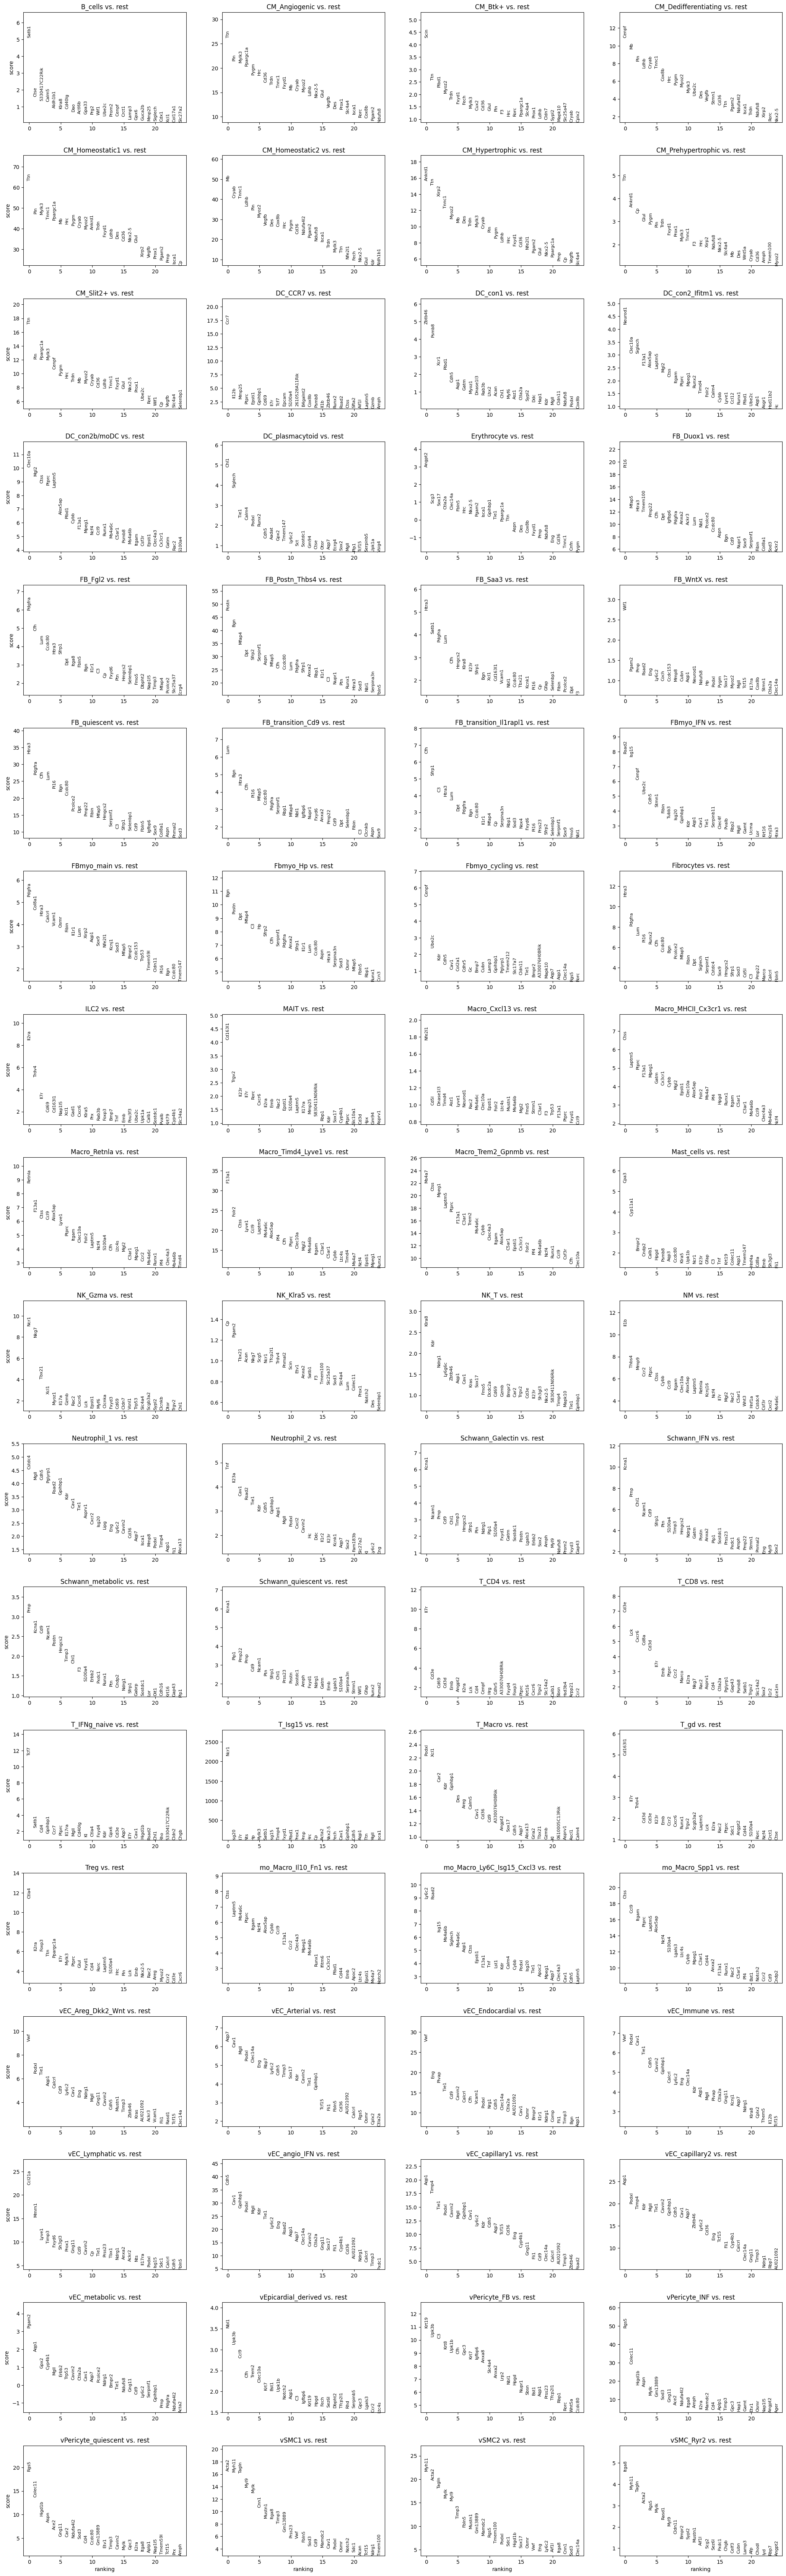

In [37]:
sc.tl.rank_genes_groups(adata, 'nico_cluster', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True, save='_t-test_detail.pdf')

In [11]:
#sc.tl.rank_genes_groups(adata, 'nico_cluster', method='wilcoxon')
#sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=True, save='_wilcoxon.pdf')

In [12]:
#sc.tl.rank_genes_groups(adata, 'nico_cluster', method='logreg')
#sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=True, save='_logreg.pdf')

In [13]:
#sc.pl.rank_genes_groups_dotplot(adata, n_genes=4)

In [14]:
#sc.pl.rank_genes_groups_dotplot(adata, n_genes=4,
#                                values_to_plot='logfoldchanges',
#                                save='_logFC.pdf'
#                               )

In [15]:
#sc.pl.rank_genes_groups_dotplot(adata, n_genes=4,
#    values_to_plot="logfoldchanges",
#    min_logfoldchange=3,
#    vmax=7,
#    vmin=-7,
#    cmap="bwr"
                               )

IndentationError: unexpected indent (3014419952.py, line 7)

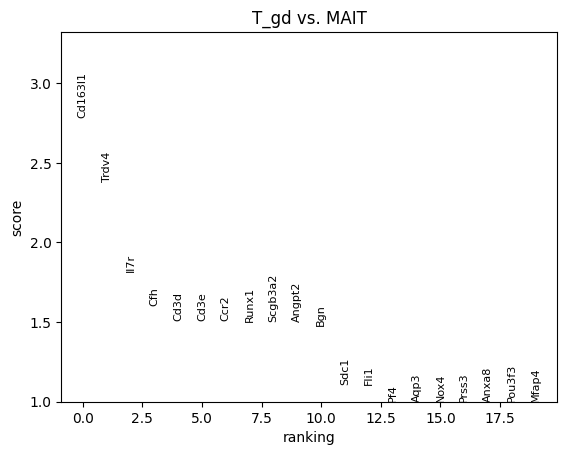

In [27]:
# compare DEG between specific clusters

sc.tl.rank_genes_groups(adata, 'nico_cluster', groups=['T_gd'], reference='MAIT', method='t-test')
sc.pl.rank_genes_groups(adata, groups=['T_gd'], n_genes=20, save='_t-test_detail___Tgd_vs_MAIT.pdf')

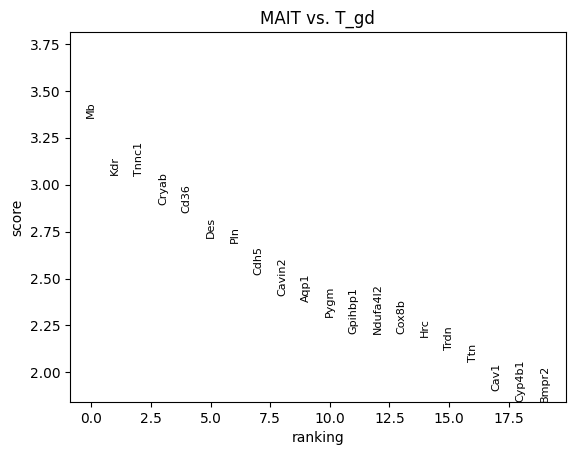

In [26]:
# compare DEG between specific clusters

sc.tl.rank_genes_groups(adata, 'nico_cluster', groups=['MAIT'], reference='T_gd', method='t-test')
sc.pl.rank_genes_groups(adata, groups=['MAIT'], n_genes=20)